Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       732
           1       0.65      0.33      0.43        92

    accuracy                           0.91       824
   macro avg       0.79      0.65      0.69       824
weighted avg       0.89      0.91      0.89       824

Random Forest Confusion Matrix:
[[716  16]
 [ 62  30]]
Random Forest Accuracy: 0.9053398058252428


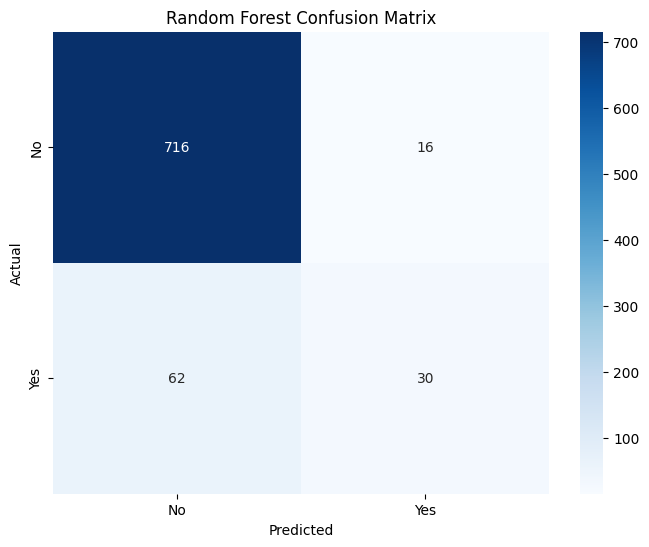

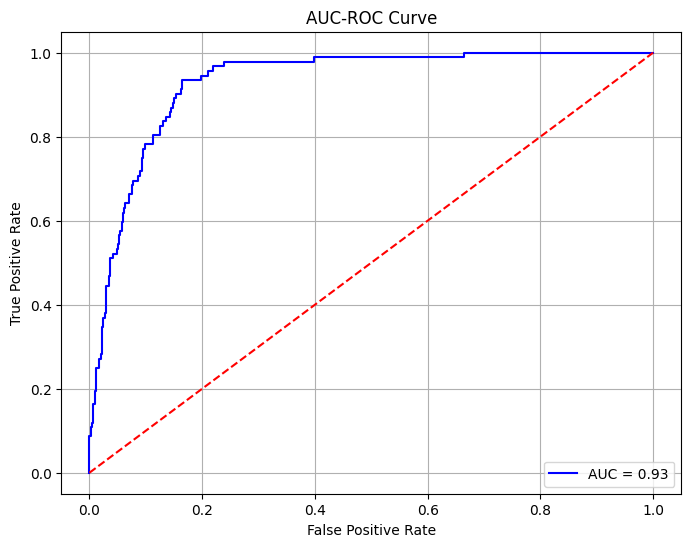

<ipython-input-5-e453f1c5a460>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="viridis")


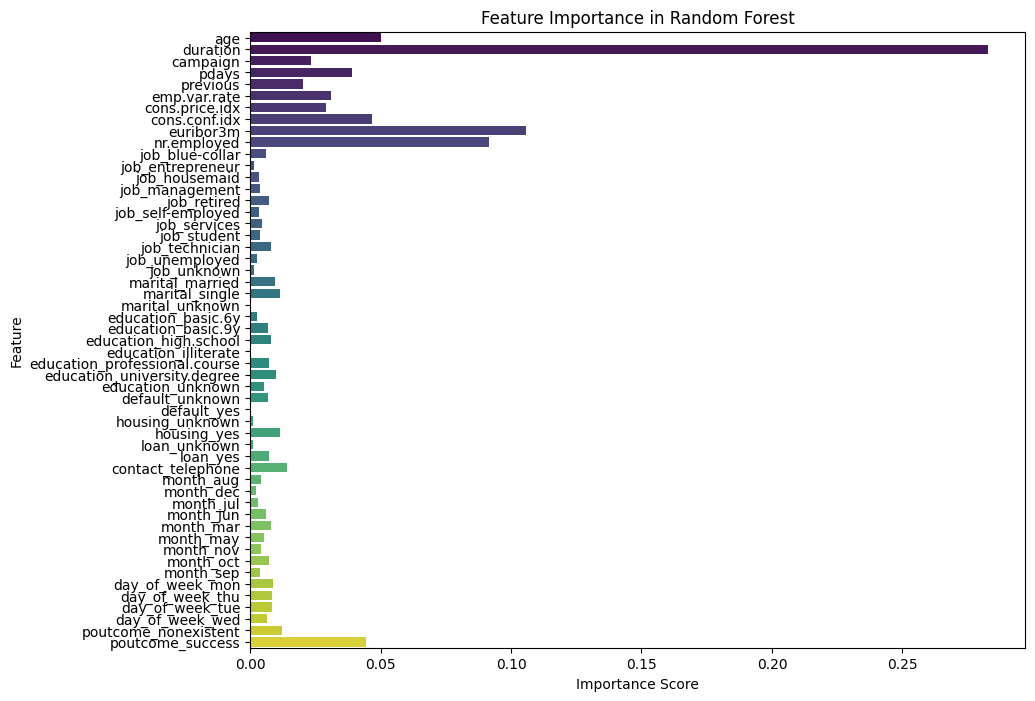

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
rf_data = pd.read_csv( '/content/preprocessed_bank_data (11).csv')

# Separate features and target
X_rf = rf_data.drop('y', axis=1)
y_rf = rf_data['y']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)

# Initialize Random Forest Classifier with manually chosen hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Maximum depth of the tree
    random_state=42    # Ensure reproducibility
)

# Train the model
rf_model.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_rf)

# Predict probabilities for AUC-ROC and class labels for evaluation
y_pred_proba = rf_model.predict_proba(X_test_rf)[:, 1]  # Get probabilities for the positive class
y_pred_rf = rf_model.predict(X_test_rf)


# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

print("Random Forest Confusion Matrix:")
conf_matrix = confusion_matrix(y_test_rf, y_pred_rf)
print(conf_matrix)

print(f"Random Forest Accuracy: {accuracy_score(y_test_rf, y_pred_rf)}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test_rf, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_proba)

# Plot AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
feature_names = X_rf.columns
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8809 - loss: 0.3977 - val_accuracy: 0.9053 - val_loss: 0.2210
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9132 - loss: 0.1992 - val_accuracy: 0.9029 - val_loss: 0.2103
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9213 - loss: 0.1809 - val_accuracy: 0.8956 - val_loss: 0.2088
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - loss: 0.1730 - val_accuracy: 0.9041 - val_loss: 0.2085
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9219 - loss: 0.1751 - val_accuracy: 0.8993 - val_loss: 0.2092
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9209 - loss: 0.1718 - val_accuracy: 0.8896 - val_loss: 0.2086
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9259 - loss: 0.1575 - val_accuracy: 0.8981 - val_loss: 0.2105
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9265 - loss: 0.1639 - val_accuracy: 0.8944 - val_

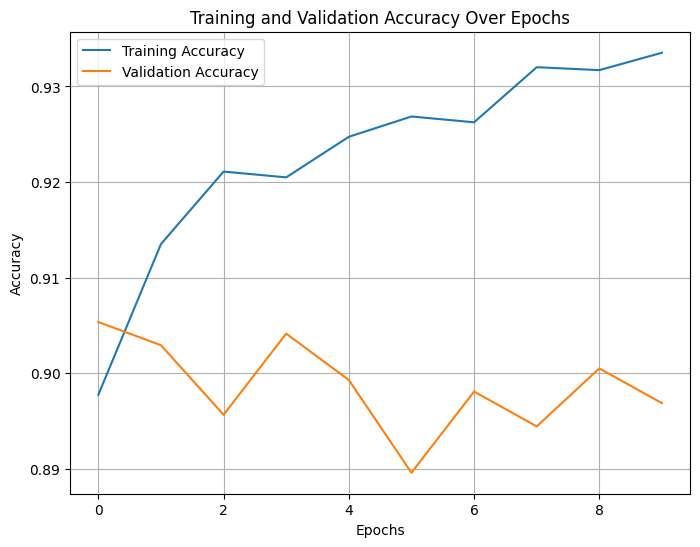

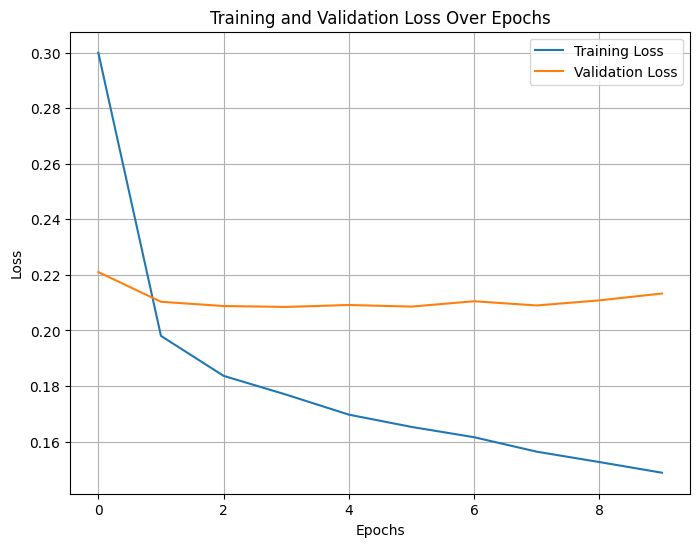

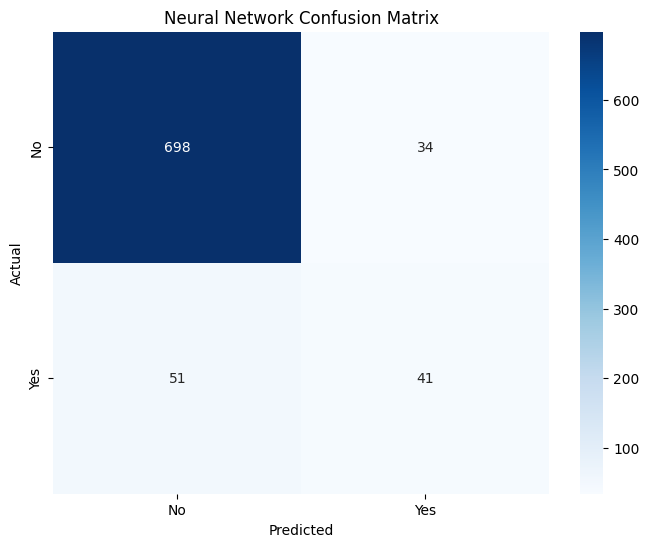

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


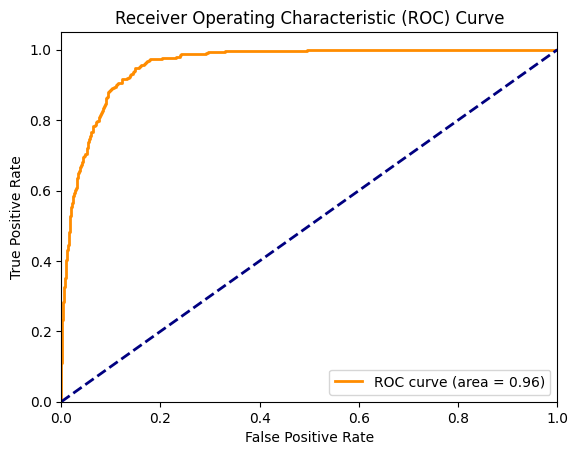

In [8]:
# Import necessary libraries for Neural Network
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

# Load the preprocessed dataset (scaled data)
nn_data = pd.read_csv('/content/preprocessed_bank_data (11).csv')

# Separate features and target
X_nn = nn_data.drop('y', axis=1)
y_nn = nn_data['y']

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# Initialize the Neural Network model
nn_model = Sequential()

# Adding layers to the model
nn_model.add(Dense(64, input_dim=X_train_nn.shape[1], activation='relu'))  # Input layer with ReLU activation
nn_model.add(Dense(32, activation='relu'))  # Hidden layer
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = nn_model.fit(
    X_train_nn, y_train_nn,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_nn, y_test_nn),
    verbose=1
)

# Predict on the test set
y_pred_nn = (nn_model.predict(X_test_nn) > 0.5).astype("int32")  # Threshold at 0.5 for binary classification

# Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_test_nn, y_pred_nn))

print("Neural Network Confusion Matrix:")
conf_matrix = confusion_matrix(y_test_nn, y_pred_nn)
print(conf_matrix)

print(f"Neural Network Accuracy: {accuracy_score(y_test_nn, y_pred_nn)}")

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Predict probabilities on the test set
y_pred_prob = nn_model.predict(X_nn)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_nn, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

